In this lab, we investigate the ways in which the statistics from a random 
sample of data can serve as point estimates for population parameters.  We're 
interested in formulating a *sampling distribution* of our estimate in order 
to learn about the properties of the estimate, such as its distribution.

## The data

We consider real estate data from the city of Ames, Iowa.  The details of 
every real estate transaction in Ames is recorded by the City Assessor's 
office.  Our particular focus for this lab will be all residential home sales 
in Ames between 2006 and 2010.  This collection represents our population of 
interest.  In this lab we would like to learn about these home sales by taking 
smaller samples from the full population.  Let's load the data.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"

ames_housing = pd.read_csv(url)
print(ames_housing.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

We see that there are quite a few variables in the data set, enough to do a 
very in-depth analysis.  


For this lab, we'll restrict our attention to just 
two of the variables: the above ground living area of the house in square feet 
(`Gr.Liv.Area`) and the sale price (`SalePrice`).  To save some effort 
throughout the lab, create two variables with short names that represent these 
two variables.  

In [2]:
area = ames_housing['GrLivArea']
price = ames_housing['SalePrice']

print("Area:", area.head())
print("Price:", price.head())

Area: 0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64
Price: 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Let's look at the distribution of area in our population of home sales by 
calculating a few summary statistics and making a histogram.

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


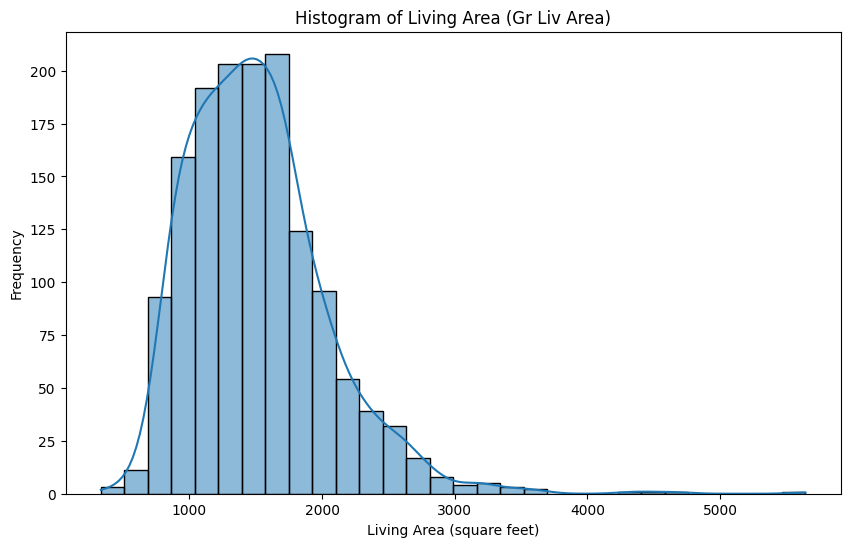

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print(area.describe())

plt.figure(figsize=(10, 6))
sns.histplot(area, bins=30, kde=True)
plt.title('Histogram of Living Area (Gr Liv Area)')
plt.xlabel('Living Area (square feet)')
plt.ylabel('Frequency')
plt.show()

In this lab we have access to the entire population, but this is rarely the 
case in real life. 

Gathering information on an entire population is often 
extremely costly or impossible.  Because of this, we often take a sample of 
the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a 
sample, we can use the following command to survey the population.

In [6]:
import numpy as np
samp1 = np.random.choice(area, 50, replace=False)
print(samp1)

[1248 1928 1130 1180 2295 1490 1556  833 2872 3140 2156 1122 1603 1626
 1482  928 1002 2640 1320 1584 1605 1494 1136 3228 1855 2418 2473 1159
 1097 1507 2828 1092 1824 4476 1525 1132 2080 1048  971 1336 1767 1362
 1040 1225 1720 1665 1986 1505 1426 1684]


This command collects a simple random sample of size 50 from the vector 
`area`, which is assigned to `samp1`.  

This is like going into the City  Assessor's database and pulling up the files on 50 random home sales.  Working  with these 50 files would be considerably simpler than working with all 2930 
home sales.

Describe the distribution of this sample. How does it compare to the 
    distribution of the population?

If we're interested in estimating the average living area in homes in Ames 
using the sample, our best single guess is the sample mean.

Mean of sample means (n=50): 1517.68002


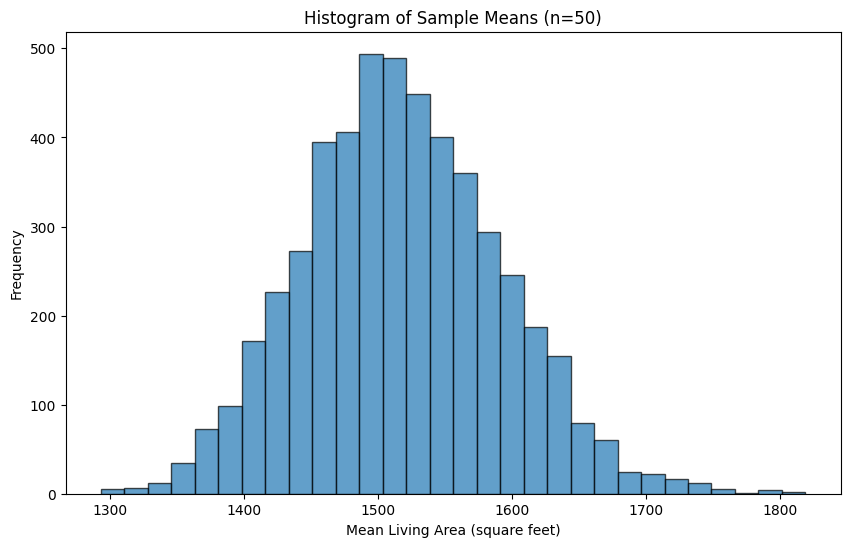

In [ ]:
# Create an empty list to store sample means
sample_means50 = []

# Loop to draw samples and calculate means
for _ in range(5000):
    samp = np.random.choice(area, 50, replace=False)
    sample_means50.append(np.mean(samp))

# Plotting the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means50, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Sample Means (n=50)')
plt.xlabel('Mean Living Area (square feet)')
plt.ylabel('Frequency')
plt.show()

How many elements are there in `sample_means50`?  Describe the sampling 
    distribution, and be sure to specifically note its center.  Would you 
    expect the distribution to change if we instead collected 50,000 sample 
    means?

## Sample size and the sampling distribution

The sampling distribution that we computed tells us much about estimating 
the average living area in homes in Ames.  

Because the sample mean is an 
unbiased estimator, the sampling distribution is centered at the true average 
living area of the the population, and the spread of the distribution 
indicates how much variability is induced by sampling only 50 home sales.

To get a sense of the effect that sample size has on our distribution, let's 
build up two more sampling distributions: one based on a sample size of 10 and 
another based on a sample size of 100.

In [8]:
sample_means10 = []
sample_means100 = []

# Loop to draw samples and calculate means
for _ in range(5000):
    samp10 = np.random.choice(area, 10, replace=False)
    sample_means10.append(np.mean(samp10))
    
    samp100 = np.random.choice(area, 100, replace=False)
    sample_means100.append(np.mean(samp100))

To see the effect that different sample sizes have on the sampling 
distribution, plot the three distributions on top of one another.

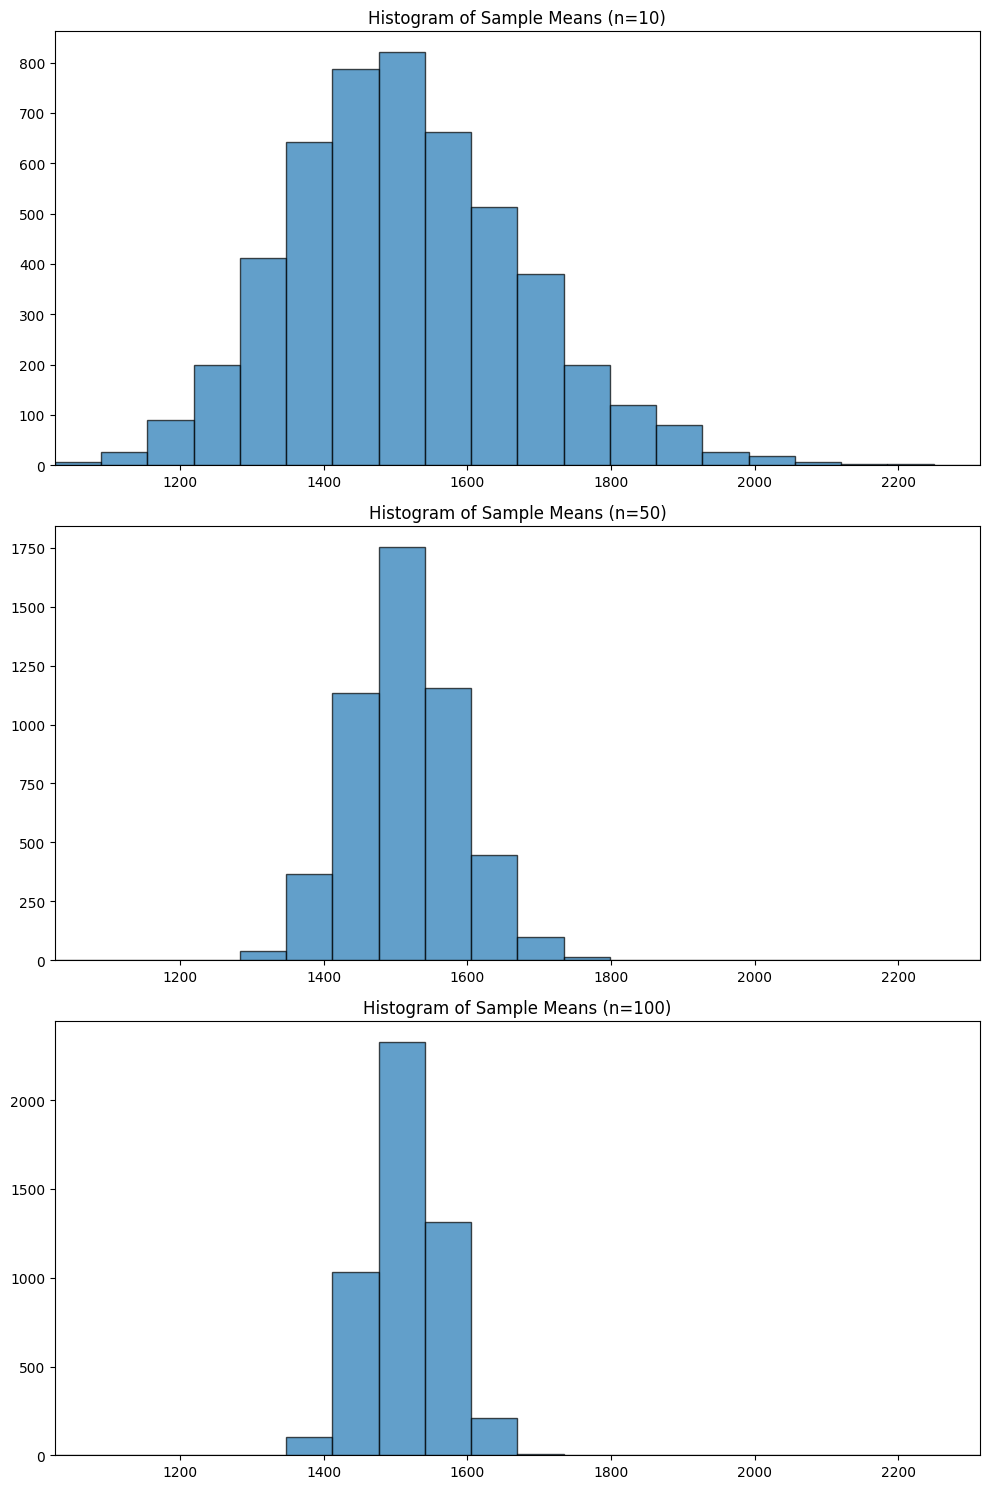

In [9]:
# Assuming sample_means10, sample_means50, and sample_means100 are already calculated
# sample_means10 = ...
# sample_means50 = ...
# sample_means100 = ...

# Set up the plot layout to have 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Calculate the x-axis range
xlimits = (min(sample_means10), max(sample_means10))

# Plot histograms
axs[0].hist(sample_means10, bins=20, range=xlimits, edgecolor='k', alpha=0.7)
axs[0].set_title('Histogram of Sample Means (n=10)')
axs[0].set_xlim(xlimits)

axs[1].hist(sample_means50, bins=20, range=xlimits, edgecolor='k', alpha=0.7)
axs[1].set_title('Histogram of Sample Means (n=50)')
axs[1].set_xlim(xlimits)

axs[2].hist(sample_means100, bins=20, range=xlimits, edgecolor='k', alpha=0.7)
axs[2].set_title('Histogram of Sample Means (n=100)')
axs[2].set_xlim(xlimits)

# Display the plots
plt.tight_layout()
plt.show()

When the sample size is larger, what happens to the center?  What about the spread?

## On your own

So far, we have only focused on estimating the mean living area in homes in 
Ames.  Now you'll try to estimate the mean home price.

-   Take a random sample of size 50 from `price`. Using this sample, what is 
    your best point estimate of the population mean?
    
    Since you have access to the population, simulate the sampling 
    distribution for $\bar{x}_{price}$ by taking 5000 samples from the 
    population of size 50 and computing 5000 sample means.  Store these means 
    in a vector called `sample_means50`. Plot the data, then describe the 
    shape of this sampling distribution. Based on this sampling distribution, 
    what would you guess the mean home price of the population to be? Finally, 
    calculate and report the population mean.

-   Change your sample size from 50 to 150, then compute the sampling 
    distribution using the same method as above, and store these means in a 
    new vector called `sample_means150`. Describe the shape of this sampling 
    distribution, and compare it to the sampling distribution for a sample 
    size of 50.  Based on this sampling distribution, what would you guess to 
    be the mean sale price of homes in Ames?

-   Of the sampling distributions from 2 and 3, which has a smaller spread?  If
    we're concerned with making estimates that are more often close to the 
    true value, would we prefer a distribution with a large or small spread?

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


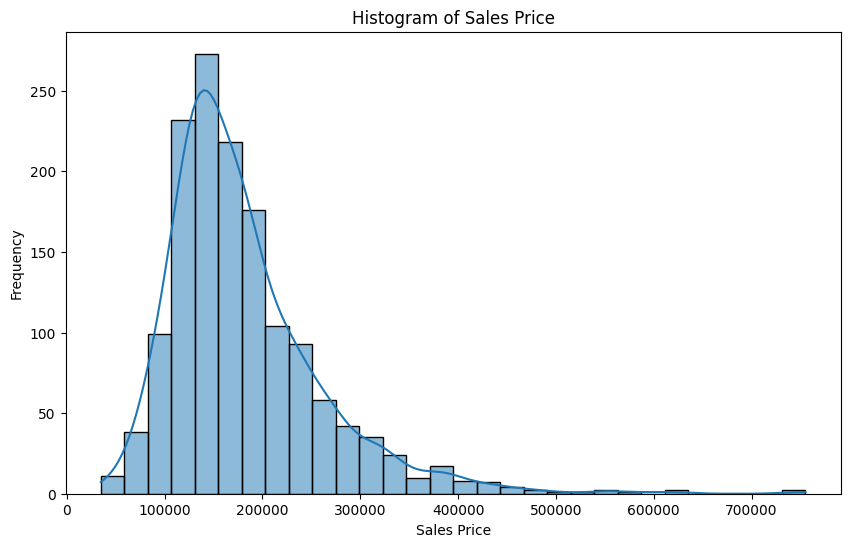

In [11]:
print(price.describe())

plt.figure(figsize=(10, 6))
sns.histplot(price, bins=30, kde=True)
plt.title('Histogram of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
samp2 = np.random.choice(price, 50, replace=False)
print(samp2)

[181000 142000 278000 280000 392500 180000 190000 188500 193879 145000
 196500 299800 140000 153337 110000  90000 201800 133000 205000 191000
 154300 185850 230000 180500 224900 149700 239000  89500 157000 190000
 181000  82500 143000 109000 151000 359100 137500 157000 143250 165500
 167500 107500 128000 237500 284000 169500 135000 136500 233000 168000]


Mean of sample means (n=50): 181027.76966


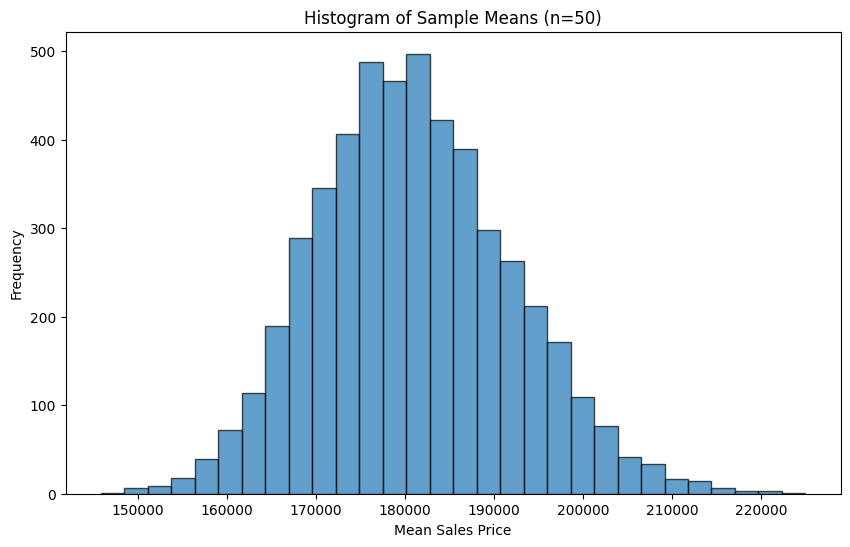

In [17]:
sample_means50_price = []

for _ in range(5000):
    samp_price = np.random.choice(price, 50, replace=False)
    sample_means50_price.append(np.mean(samp_price))

print("Mean of sample means (n=50):", np.mean(sample_means50_price))

plt.figure(figsize=(10, 6))
plt.hist(sample_means50_price, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Sample Means (n=50)')
plt.xlabel('Mean Sales Price')
plt.ylabel('Frequency')
plt.show()

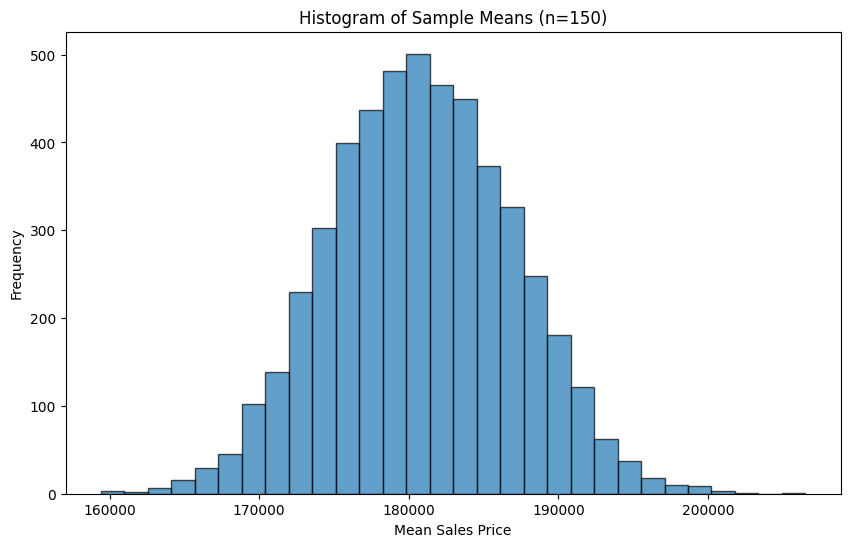

In [18]:
sample_means150_price = []

for _ in range(5000):
    samp150 = np.random.choice(price, 150, replace=False)
    sample_means150_price.append(np.mean(samp150))

plt.figure(figsize=(10, 6))
plt.hist(sample_means150_price, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Sample Means (n=150)')
plt.xlabel('Mean Sales Price')
plt.ylabel('Frequency')
plt.show()

## Sample Proportion

Lets assume that a basketball player is shooting 10 times (n=10) and scoring with 0.4 probability (probability of success p=0.4).

If this basketball player does this exercise ones, we can calculate number of sucesses as follows

In [25]:
# Generate random binomial samples
scoring_success_1 = np.random.binomial(n=10, p=0.4, size=1)
prob_1 = scoring_success_1 / 10
print("Proportion of successes in 1 trial:", prob_1)

Proportion of successes in 1 trial: [0.4]


In [29]:
# Daily
scoring_success_10 = np.random.binomial(n=10, p=0.4, size=10)
prob_10 = scoring_success_10 / 10
print("Proportion of successes in 10 trials:", prob_10)

Proportion of successes in 10 trials: [0.6 0.2 0.5 0.6 0.5 0.5 0.1 0.3 0.3 0.3]


In [33]:
# Weekly
scoring_success_50 = np.random.binomial(n=10, p=0.4, size=50)
prob_50 = scoring_success_50 / 10
print("Proportion of successes in 50 trials:", prob_50)

Proportion of successes in 50 trials: [0.3 0.2 0.3 0.1 0.4 0.3 0.9 0.1 0.3 0.3 0.5 0.3 0.6 0.3 0.5 0.3 0.3 0.6
 0.4 0.6 0.3 0.5 0.5 0.2 0.5 0.5 0.2 0.3 0.3 0.4 0.5 0.7 0.3 0.3 0.5 0.3
 0.6 0.5 0.1 0.5 0.4 0.2 0.3 0.1 0.4 0.5 0.4 0.5 0.3 0.4]


In [34]:
# Monthly
scoring_success_200 = np.random.binomial(n=10, p=0.4, size=200)
prob_200 = scoring_success_200 / 10

In [37]:
# Yearly
scoring_success_2600 = np.random.binomial(n=10, p=0.4, size=2600)
prob_2600 = scoring_success_2600 / 10

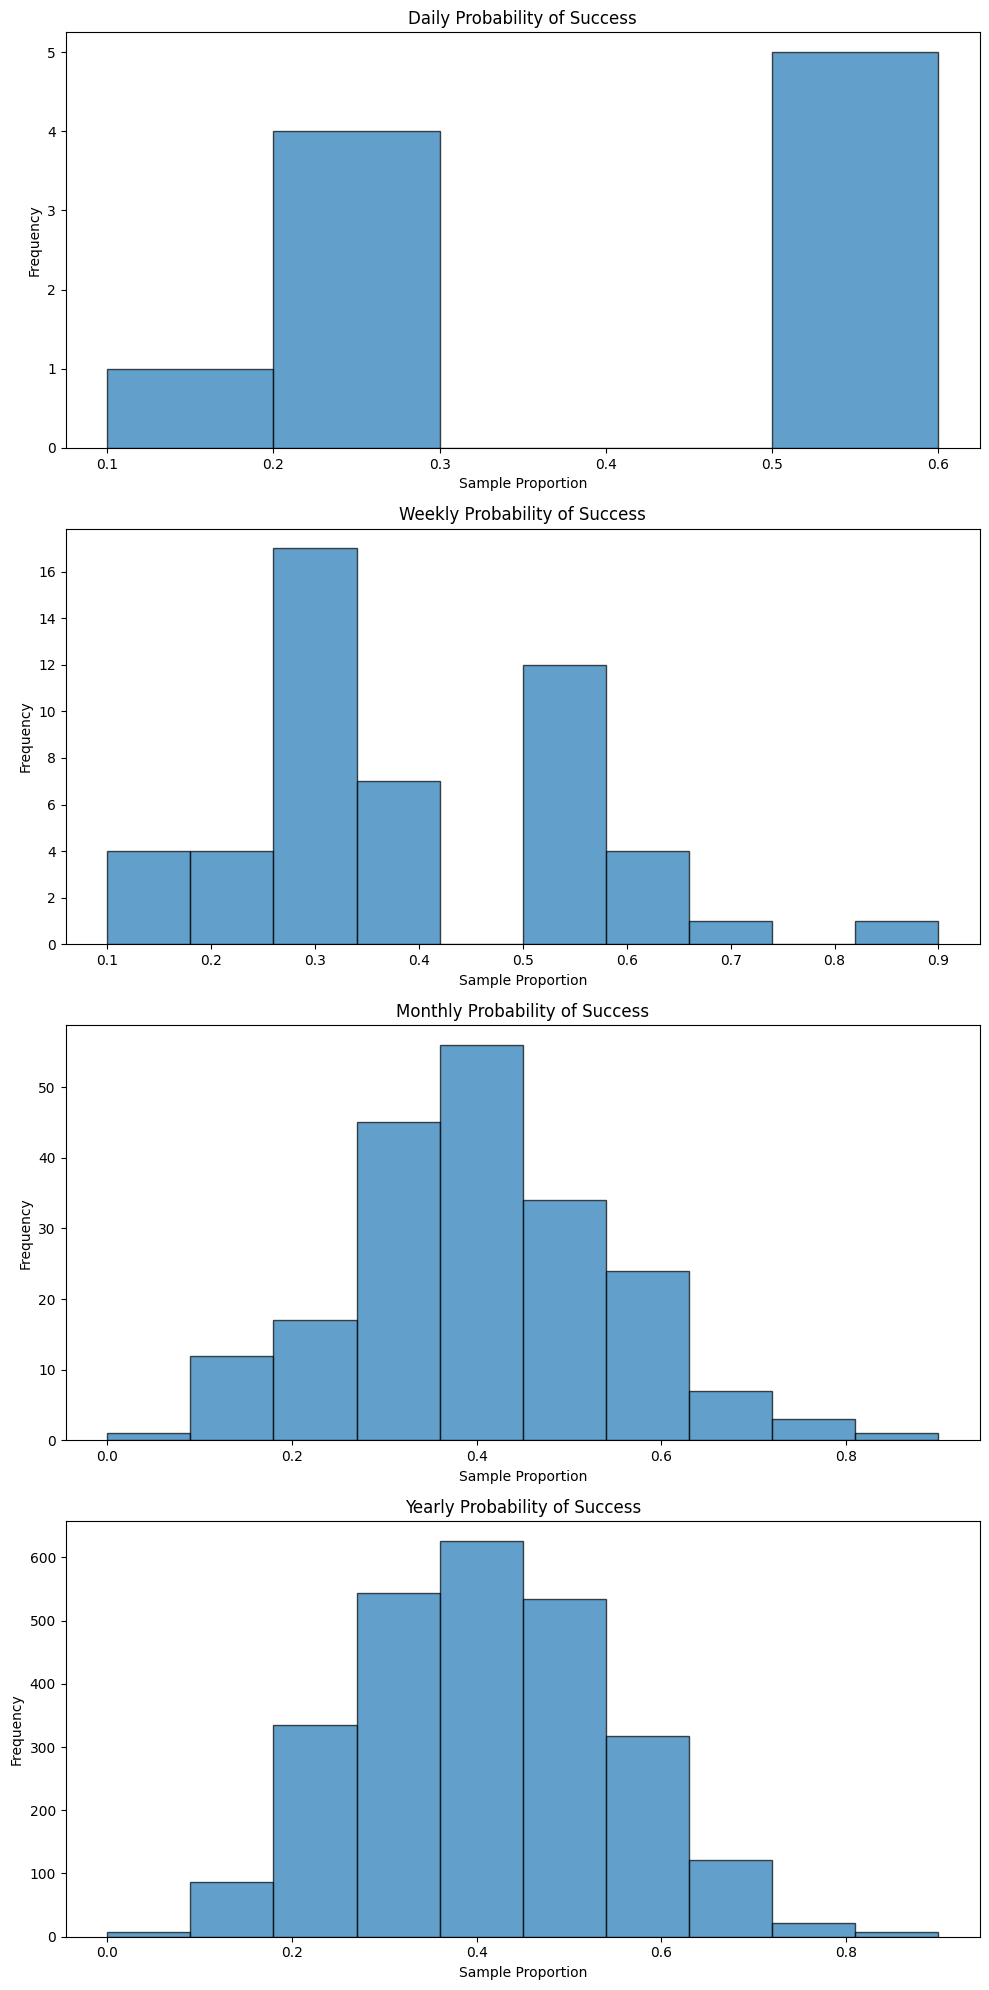

In [38]:
# Plot histograms
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

axs[0].hist(prob_10, bins=5, edgecolor='k', alpha=0.7)
axs[0].set_title('Daily Probability of Success')
axs[0].set_xlabel('Sample Proportion')
axs[0].set_ylabel('Frequency')

axs[1].hist(prob_50, bins=10, edgecolor='k', alpha=0.7)
axs[1].set_title('Weekly Probability of Success')
axs[1].set_xlabel('Sample Proportion')
axs[1].set_ylabel('Frequency')

axs[2].hist(prob_200, bins=10, edgecolor='k', alpha=0.7)
axs[2].set_title('Monthly Probability of Success')
axs[2].set_xlabel('Sample Proportion')
axs[2].set_ylabel('Frequency')

axs[3].hist(prob_2600, bins=10, edgecolor='k', alpha=0.7)
axs[3].set_title('Yearly Probability of Success')
axs[3].set_xlabel('Sample Proportion')
axs[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exercises

## Exercise 1.

Your task is to analyze survey data available at the following link: surveydata3.csv. The analysis includes the estimation of the mean with its standard error, minimum sample size for a specified precision, and estimating proportions.

- The data is loaded from the CSV file available at the following link: [surveydata3.csv](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3.csv).
- The dataset contains 753 rows and 55 columns, including various demographic and survey response variables.
- A detailed description of the dataset can be found [here](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3_description.csv).

**Instructions**

**Load the Data:**

- Load the data from the CSV file.
- Calculate the mean number of hours of sleep per night. Check the std error.
- Calculate the proportion of people who want to buy Udacity swag and prefer hoodies. Check its std error.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/clean_surveydata3.xlsx?raw=true'
df = pd.read_excel(url, engine='openpyxl')        # WTFDFFFFFFFFFF
dane = df["sleep hours per night"]
dane = dane.dropna()
print(dane.head())

plt.hist(dane,bins=10);

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [41]:
import numpy as np
from scipy import stats
mean_sleep_time = np.mean(dane)
se_mean = stats.sem(dane) # sd/sqrt(n)
relative_error = (se_mean/mean_sleep_time)*100
print(mean_sleep_time)
print(se_mean)
print(relative_error)
# What is the probability that some sample of Udemy users will sleep on average for >7 hours? Is it possible to find such a one?

1-stats.norm.cdf(7,6.9,0.036)
# As you can see, it is almost impossible... 0.27% of samples will have the average higher than 7 hours.

ModuleNotFoundError: No module named 'scipy'

In [27]:
# Calculate the total number of respondents in the dataset
total_respondents = df.shape[0]

# Calculate the number of people who want to buy swag and prefer hoodies
buy_swag_and_hoodie_count = df[(df['buy swag'] == 1) & (df['item'].str.lower() == 'hoodie')].shape[0]

# Calculate the proportion of people who want to buy swag and prefer hoodies out of the entire dataset
proportion_buy_swag_and_hoodies = buy_swag_and_hoodie_count / total_respondents if total_respondents > 0 else 0

# Display the proportion result
print('Proportion buy swag Udity hoodies is (%)' , proportion_buy_swag_and_hoodies * 100 )

p = proportion_buy_swag_and_hoodies  # Proportion of people who want to buy swag and prefer hoodies
n = total_respondents  # Total number of respondents
print('Sample size:',n)

# Standard error for the proportion
standard_error_proportion = np.sqrt((p * (1 - p)) / n)
print('standard_error_proportion in percentage points.',standard_error_proportion)

# Relative error in %:
std_error_relative = (standard_error_proportion/p)*100
print('std_error_relative in %',std_error_relative)


Proportion buy swag Udity hoodies is (%) 6.640106241699867
Sample size: 753
standard_error_proportion in percentage points. 0.009073402992724569
std_error_relative in % 13.664544907043203


As you can see, we cannot treat this sample proportion as informative - it is very risky to say, that it is 6.64% (sample error 13.66%!!)

Let's treat this sample as the pilot study only.
Then we can ask the question, how many Udemy users we need to sample to get 3% error?

Standard error of the proportion in the sample is: 

$$
\mathrm{SE}(\hat{p}) = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

Relative error (%) must be equal to at least (let's say) d (3%). Then the minimal sample size is:

$$
\frac{\mathrm{SE}(\hat p)}{\hat p}=d,\qquad
\mathrm{SE}(\hat p)=\sqrt{\frac{\hat p(1-\hat p)}{n}}
\quad\Rightarrow\quad
n=\frac{1-\hat p}{\hat p\,d^{2}}.
$$


If we want d to be equal to 0.03:

In [38]:
import math
d=0.03
minimum_n = math.ceil((1-p)/(p*d**2))
print('We need to survey at least:',minimum_n,'Udemy users to achieve 3% precision.')

We need to survey at least: 15623 Udemy users to achieve 3% precision.
